In [1]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from lorenz_attractor import lorenz, time_delay_lorenz

## Part 1
Load and plot data

In [2]:
data = np.loadtxt('takens_1.txt')
x = data[:,0]
y = data[:,1]
t = np.linspace(x.min(), x.max(), len(x))

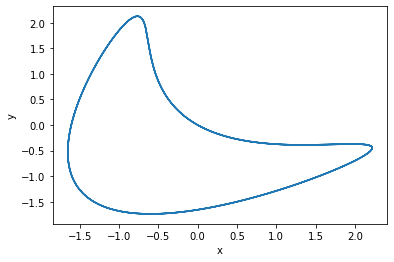

In [3]:
plt.plot(x, y)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

Plot first coordinate against line number (time)

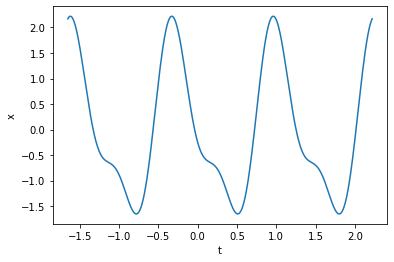

In [4]:
plt.plot(t, x)
plt.xlabel("t")
plt.ylabel("x")
plt.show()

Plot first coordinate against delayed version

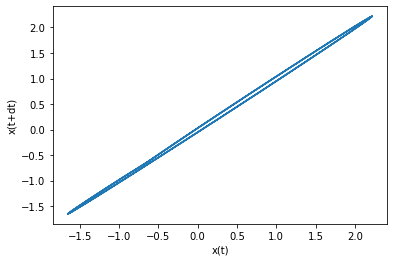

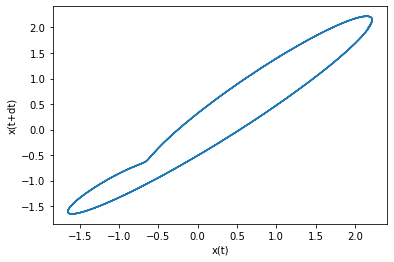

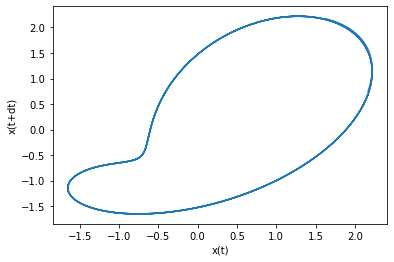

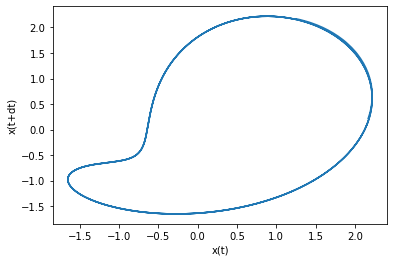

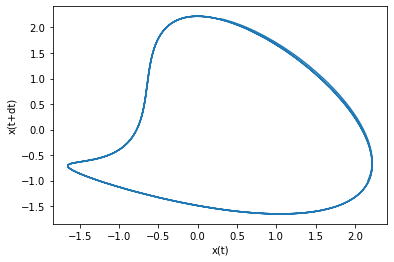

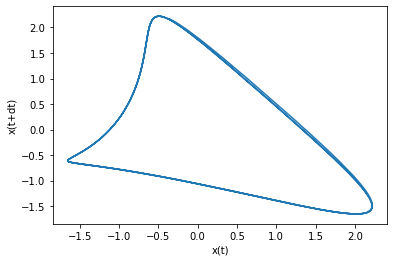

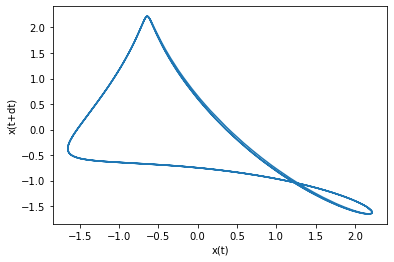

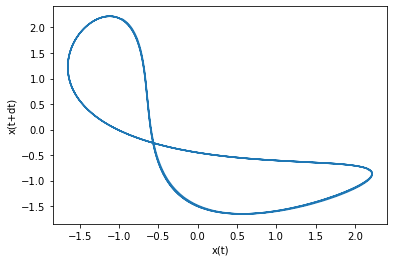

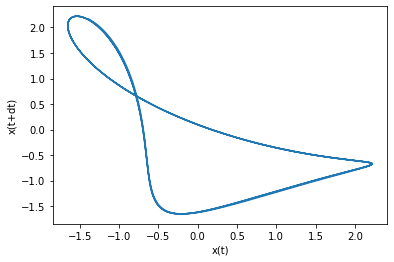

In [5]:
for dt in [1,10,40,50,75,100,125,175,200]:    
    delayed_x = np.roll(x, dt)
    plt.plot(x, delayed_x)
    plt.xlabel("x(t)")
    plt.ylabel("x(t+dt)")
    plt.show()

## Part 2
Set parameters for the lorenz attractor

In [6]:
iterations = 10000
dt = 0.01

sigma = 10
rho = 28
beta = 8/3

Compute lorenz attractor values over the number of iterations and plot lorenz attractor

In [7]:
xs = np.empty(iterations + 1)
ys = np.empty(iterations + 1)
zs = np.empty(iterations + 1)

# Set initial values
xs[0], ys[0], zs[0] = (10, 10, 10)

for i in range(iterations):
    x_dot, y_dot, z_dot = lorenz(xs[i], ys[i], zs[i], sigma, rho, beta)
    xs[i + 1] = xs[i] + (x_dot * dt)
    ys[i + 1] = ys[i] + (y_dot * dt)
    zs[i + 1] = zs[i] + (z_dot * dt)

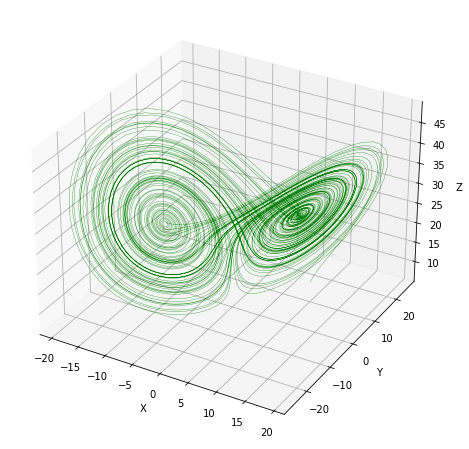

In [8]:
fig = plt.figure(figsize=(8,8))
ax = fig.gca(projection='3d')
ax.plot(xs, ys, zs, 'g-', lw=0.3)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.savefig("lorenz")
plt.show()

Plot the values of a single coordinate against the iterations 

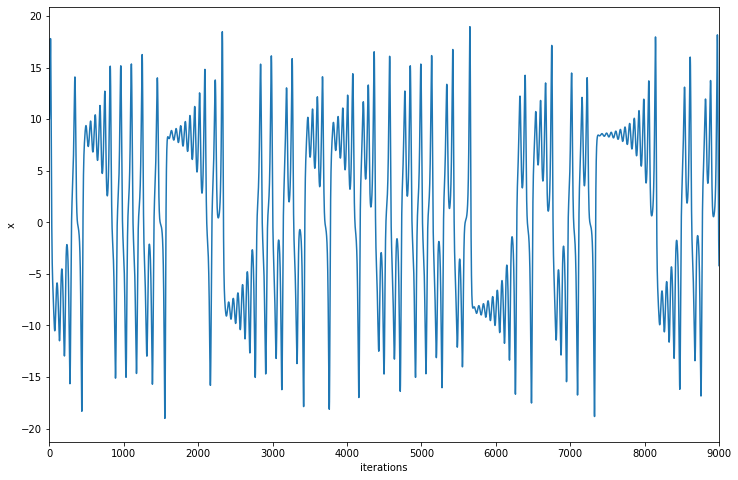

In [9]:
idx = np.empty(len(xs))
for i in range(len(xs)):
    idx[i]=i

fig = plt.figure(figsize=(12,8))   
plt.xlabel("iterations")
plt.ylabel("x")
plt.xlim([0, 9000])
plt.plot(idx, xs)
plt.savefig("xs(t)")
plt.show()

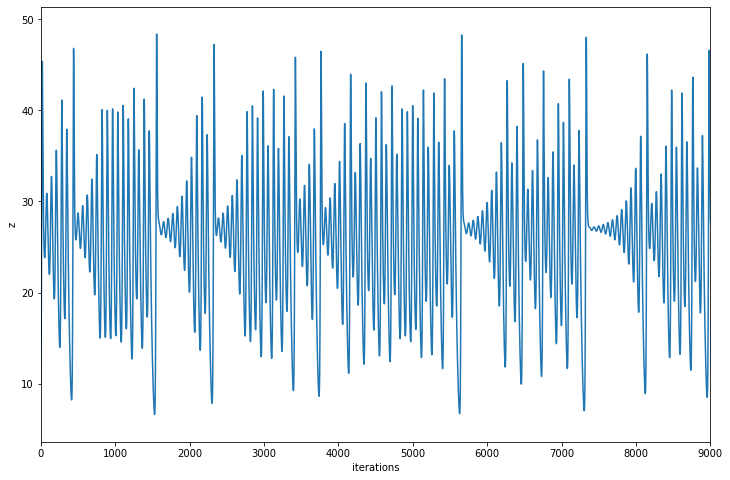

In [10]:
fig = plt.figure(figsize=(12,8))   
plt.xlabel("iterations")
plt.ylabel("z")
plt.xlim([0, 9000])
plt.plot(idx, zs)
plt.savefig("zs(t)")
plt.show()

Compute and plot time-delayed embeddings

In [11]:
dn = 10
X1, Y1, Z1 = time_delay_lorenz(xs, dn)
X2, Y2, Z2 = time_delay_lorenz(zs, dn)

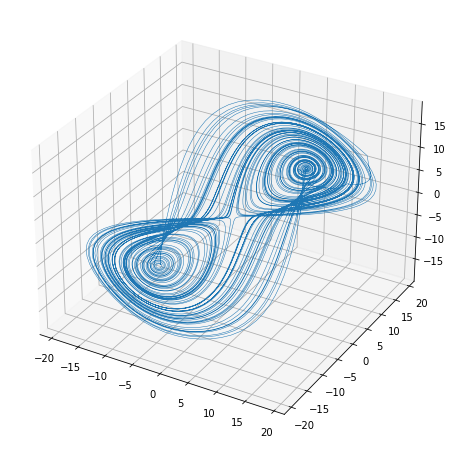

In [12]:
fig = plt.figure(figsize=(8, 8))
ax = fig.gca(projection='3d')
ax.plot(X1, Y1, Z1, linewidth=0.5)
plt.savefig("xs_time_delay")
plt.show()

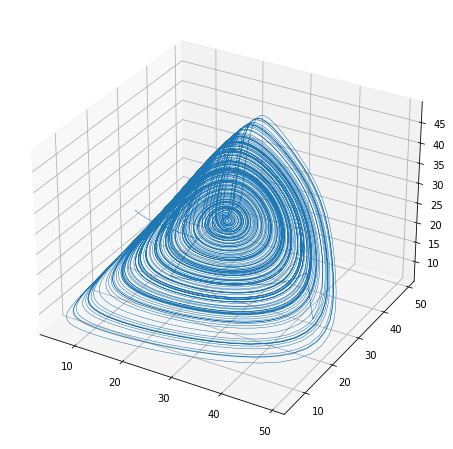

In [13]:
fig = plt.figure(figsize=(8, 8))
ax = fig.gca(projection='3d')
ax.plot(X2, Y2, Z2, linewidth=0.5)
plt.savefig("zs_time_delay")
plt.show()

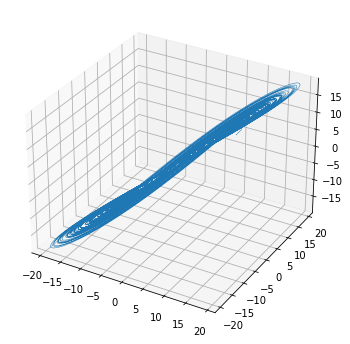

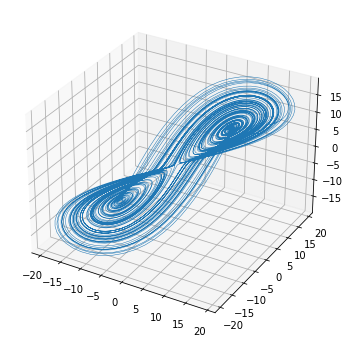

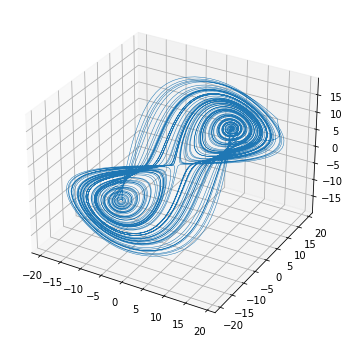

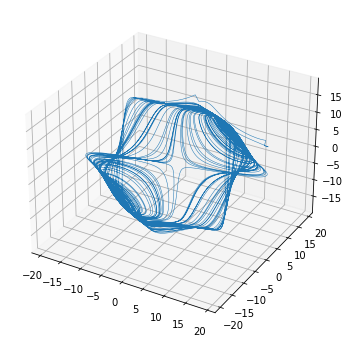

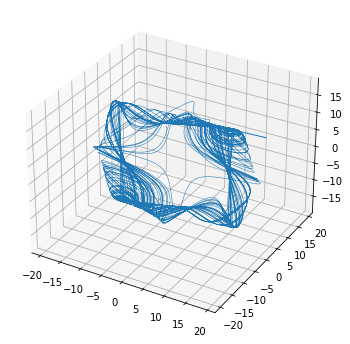

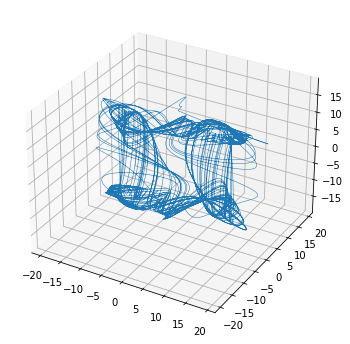

In [14]:
for i in [1,5,10,20,30,40]:
    X1, Y1, Z1 = time_delay_lorenz(xs, i)
    fig = plt.figure(figsize=(6, 6))
    ax = fig.gca(projection='3d')
    ax.plot(X1, Y1, Z1, linewidth=0.5)
    plt.show()